In [133]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd



![alt text](map.jpg "Схема GPS")

# Агрохимия 

In [134]:
agrochemistry_total = pd.read_csv('полевые данные общая/ready_data/агрохимия.csv')
agrochemistry_total["Год"] = agrochemistry_total["Год"].astype(str)
agrochemistry_total["GPS №"] = agrochemistry_total["GPS №"].astype(str)
agrochemistry_total.head(5)

,Год,GPS №,Тип обработки,Глубина,повторность,"рН солевой вытяжки, ед. рН","рН водной вытяжки, ед. рН","Фосфор (подвижная форма), мг/кг","Калий (подвижная форма), млн-1","Общий азот, %",...,"Массовая доля магния (водорастворимая форма), ммоль/100 г почвы","Массовая доля кальция (водорастворимая форма), ммоль/100 г почвы","Массовая доля натрия (водорастворимая форма), мг•экв на 100 г почвы","Массовая доля калия (водорастворимая форма), мг•экв на 100 г почвы","Сумма поглощенных оснований по Каппену, ммоль/100 г","Массовая доля плотного остатка водной вытяжки, %","Карбонат и бикарбонат-ионы, ммоль/100 г","Массовая доля общего содержания карбонатов (по Козловскому), % (CO2)","Массовая доля общего содержания карбонатов (по Козловскому), %(CaCO3)","Органический углерод, %"
0,2021,584,ТТ,0-10,[0],6.69,8.73,23.4,366.273656,0.13,...,0.093071,0.368947,0.000031,0.000552,24.700000000000003,0.090,0.03355,1.309,2.976666,1.3401
1,2021,584,ТТ,10-20,[0],6.73,8.71,21.0,332.802456,0.13,...,0.092504,0.333997,0.000029,0.000519,24.55,0.068,0.03050,1.540,3.501960,1.2496
2,2021,584,ТТ,20-30,[0],6.81,8.91,12.6,283.751496,0.10,...,0.098583,0.392423,0.000037,0.000302,24.6,0.114,0.02745,1.804,4.102296,1.0260
3,2021,584,ТТ,30-40,[0],6.87,8.66,8.4,214.485376,0.09,...,0.116458,0.341597,0.000109,0.000192,24.55,0.058,0.03355,2.992,6.803808,0.6655
4,2021,584,ТТ,40-50,[0],6.87,8.77,7.4,200.282992,0.08,...,0.104296,0.316072,0.000096,0.000150,24.65,0.070,0.02745,2.398,5.453052,0.7717


In [135]:
agrochem_columns = ['Год', 'GPS №', 'Тип обработки', 'Глубина', 'повторность',
       'рН солевой вытяжки, ед. рН', 'рН водной вытяжки, ед. рН',
       'Фосфор (подвижная форма), мг/кг', 'Калий (подвижная форма), млн-1',
       'Общий азот, %', 'Общий углерод, %', 'Органический углерод, %']
agrochemistry_main = agrochemistry_total[agrochemistry_total['Глубина'].isin(['0-10',"10-20","20-30"])][agrochem_columns]
agrochemistry_main.head(10)

,Год,GPS №,Тип обработки,Глубина,повторность,"рН солевой вытяжки, ед. рН","рН водной вытяжки, ед. рН","Фосфор (подвижная форма), мг/кг","Калий (подвижная форма), млн-1","Общий азот, %","Общий углерод, %","Органический углерод, %"
0,2021,584,ТТ,0-10,[0],6.69,8.73,23.4,366.273656,0.13,1.6971,1.3401
1,2021,584,ТТ,10-20,[0],6.73,8.71,21.0,332.802456,0.13,1.6696,1.2496
2,2021,584,ТТ,20-30,[0],6.81,8.91,12.6,283.751496,0.10,1.5180,1.0260
12,2021,584,ТТ,0-10,[1],7.18,8.55,23.6,339.881976,0.13,1.3921,1.0681
13,2021,584,ТТ,10-20,[1],7.20,8.58,15.4,324.326296,0.13,1.4282,1.1162
14,2021,584,ТТ,20-30,[1],7.24,8.63,11.8,267.112216,0.12,1.3800,1.0080
15,2021,584,ТТ,0-10,[2],7.32,8.68,13.0,242.478376,0.11,1.5871,0.9571
16,2021,584,ТТ,10-20,[2],7.34,8.79,8.6,167.567904,0.07,1.7053,0.9433
17,2021,584,ТТ,20-30,[2],7.50,8.73,8.0,156.910096,0.07,1.7359,1.0159
18,2021,584,ТТ,0-10,[3],7.43,8.36,19.2,290.277176,0.10,1.5447,0.9327


In [136]:
agrochemistry_main.groupby(['Тип обработки','Глубина']).agg([np.mean, np.std,np.median])

рН солевой вытяжки, ед. рН                   \
                                            mean       std median   
Тип обработки Глубина                                               
ПП            0-10                      7.248788  0.105320   7.26   
              10-20                     7.281818  0.085858   7.28   
              20-30                     7.263600  0.096258   7.26   
ТТ            0-10                      7.249500  0.189972   7.31   
              10-20                     7.229524  0.198380   7.29   
              20-30                     7.214667  0.179796   7.24   

                      рН водной вытяжки, ед. рН                   \
                                           mean       std median   
Тип обработки Глубина                                              
ПП            0-10                     8.245758  0.214360  8.230   
              10-20                    8.282727  0.160649  8.280   
              20-30                    8.202800  0.177072  8.210   
ТТ            0-10                     8.356111  0.221894  8.375   
              10-20                    8.389524  0.275708  8.370   
              20-30                    8.294000  0.303004  8.270   

                      Фосфор (подвижная форма), мг/кг                        \
                                                 mean        std     median   
Тип обработки Глубина                                                         
ПП            0-10                          19.982789  17.464783  15.681445   
              10-20                         14.267293   6.160291  13.218391   
              20-30                         11.790634   4.797870  10.755337   
ТТ            0-10                          23.333126   6.116723  22.085386   
              10-20                         18.185711  10.227940  17.159278   
              20-30                         11.402649   3.190320  11.400000   

                      Калий (подвижная форма), млн-1  ...              \
                                                mean  ...      median   
Тип обработки Глубина                                 ...               
ПП            0-10                        422.846028  ...  357.395360   
              10-20                       349.779999  ...  320.625200   
              20-30                       329.135457  ...  282.675120   
ТТ            0-10                        322.886930  ...  308.890000   
              10-20                       291.527019  ...  317.511656   
              20-30                       234.665379  ...  223.238456   

                      Общий азот, %                  Общий углерод, %  \
                               mean       std median             mean   
Тип обработки Глубина                                                   
ПП            0-10         0.185152  0.047901   0.17         1.664900   
              10-20        0.172121  0.025588   0.16         1.501294   
              20-30        0.165200  0.024685   0.16         1.414280   
ТТ            0-10         0.150476  0.024592   0.15         1.607005   
              10-20        0.144286  0.029928   0.15         1.620329   
              20-30        0.132000  0.031214   0.14         1.530273   

                                        Органический углерод, %            \
                            std  median                    mean       std   
Тип обработки Глубина                                                       
ПП            0-10     0.451149  1.5154                1.350852  0.506985   
              10-20    0.227063  1.3963                1.178302  0.284810   
              20-30    0.179636  1.4100                1.144863  0.186345   
ТТ            0-10     0.161062  1.5755                1.238589  0.170553   
              10-20    0.165299  1.5933                1.218601  0.165052   
              20-30    0.145133  1.5413                1.078673  0.207144   

                                 
                         median

In [152]:
dispers = agrochemistry_main.copy()
dispers.columns = dispers.columns.str.replace(r'[\(),.%№ /-]', '')
reg = ols('Органическийуглерод ~Глубина + GPS +  Типобработки + Год' ,  data=dispers).fit()
aov = sm.stats.anova_lm(reg)
aov

<ipython-input-152-74b96b358914>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dispers.columns = dispers.columns.str.replace(r'[\(),.%№ /-]', '')


,df,sum_sq,mean_sq,F,PR(>F)
Глубина,2.0,0.843527,0.421764,5.731982,0.004160
GPS,21.0,4.481168,0.213389,2.900064,0.000131
Типобработки,1.0,0.263238,0.263238,3.577543,0.060898
Год,2.0,0.051122,0.025561,0.347384,0.707220
Residual,124.0,9.124015,0.073581,NaN,NaN


In [153]:
dispers = agrochemistry_main.copy()
dispers.columns = dispers.columns.str.replace(r'[\(),.%№ /-]', '')
reg = ols('Органическийуглерод ~Глубина + GPS +  Типобработки + Год' ,  data=dispers[dispers['Год'] != '2019']).fit()
aov = sm.stats.anova_lm(reg)
aov

<ipython-input-153-339053d5d9ac>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dispers.columns = dispers.columns.str.replace(r'[\(),.%№ /-]', '')


,df,sum_sq,mean_sq,F,PR(>F)
Глубина,2.0,0.390761,0.195380,2.421289,0.093527
GPS,7.0,1.621135,0.231591,2.870035,0.008628
Типобработки,1.0,0.000110,0.000110,0.001363,0.970620
Год,1.0,0.107715,0.107715,1.334880,0.250442
Residual,110.0,8.876194,0.080693,NaN,NaN


Резюме - Тип обработки у углерода к сожалению нигде не играет

<AxesSubplot:xlabel='Глубина', ylabel='Органический углерод, %'>

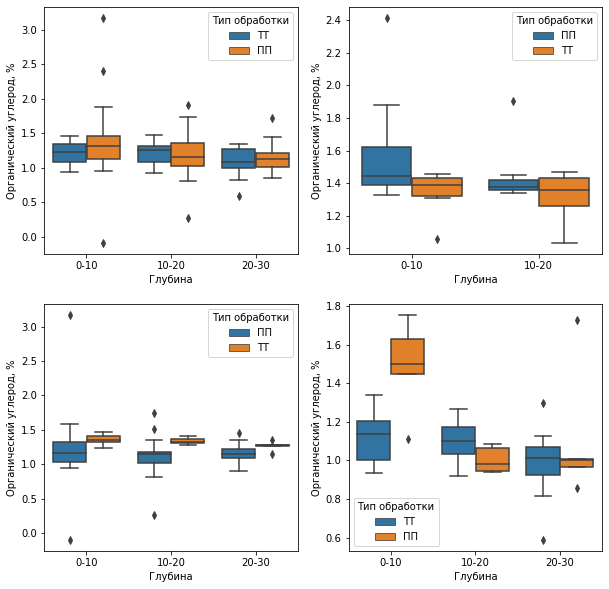

In [113]:
f, ax = plt.subplots(2,2,figsize=(10,10))
sns.boxplot(data = agrochemistry_main, x = "Глубина", y = "Органический углерод, %", hue = "Тип обработки", ax = ax[0,0])
sns.boxplot(data = agrochemistry_main[agrochemistry_main['Год'] == '2019'], x = "Глубина", y = "Органический углерод, %", hue = "Тип обработки", ax = ax[0,1])
sns.boxplot(data = agrochemistry_main[agrochemistry_main['Год'] == '2020'], x = "Глубина", y = "Органический углерод, %", hue = "Тип обработки", ax = ax[1,0])
sns.boxplot(data = agrochemistry_main[agrochemistry_main['Год'] == '2021'], x = "Глубина", y = "Органический углерод, %", hue = "Тип обработки", ax = ax[1,1])


<AxesSubplot:xlabel='Глубина', ylabel='Органический углерод, %'>

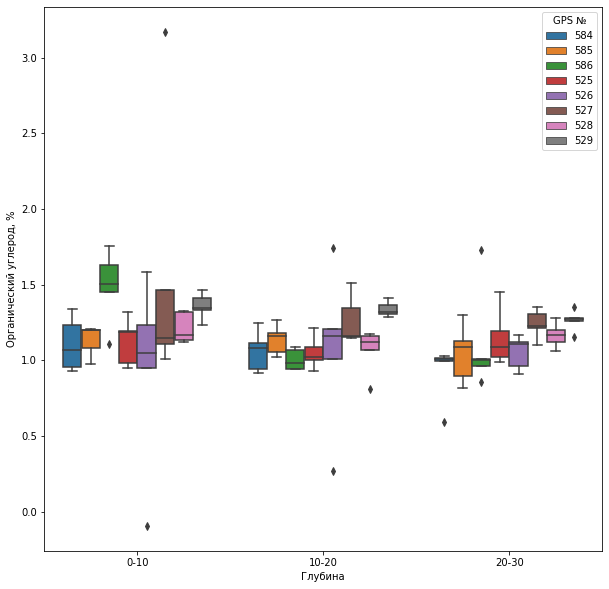

In [114]:
f, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data = agrochemistry_main[agrochemistry_main['Год'].isin(['2020','2021'])], x = "Глубина", y = "Органический углерод, %", hue = "GPS №", ax = ax)


In [127]:
agrochemistry_main.columns = agrochemistry_main.columns.str.replace(r'[\(),.%№ /-]', '')
reg = ols('Органическийуглерод ~GPS + Год + Типобработки + Глубина' ,  data=agrochemistry_main[agrochemistry_main['Год'] != '2019' ]).fit()
aov = sm.stats.anova_lm(reg)



aov

<ipython-input-127-a61e52bcc3ec>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  agrochemistry_main.columns = agrochemistry_main.columns.str.replace(r'[\(),.%№ /-]', '')


,df,sum_sq,mean_sq,F,PR(>F)
GPS,7.0,1.621135,0.231591,2.870035,0.008628
Год,1.0,0.005110,0.005110,0.063329,0.801779
Типобработки,1.0,0.052482,0.052482,0.650391,0.421713
Глубина,2.0,0.423514,0.211757,2.624243,0.077030
Residual,110.0,8.876194,0.080693,NaN,NaN


In [120]:
agrochemistry_main.columns

Index(['Год', 'GPS', 'Типобработки', 'Глубина', 'повторность',
       'рНсолевойвытяжкиедрН', 'рНводнойвытяжкиедрН',
       'Фосфорподвижнаяформамгкг', 'Калийподвижнаяформамлн1', 'Общийазот',
       'Общийуглерод', 'Органическийуглерод'],
      dtype='object')

LinAlgError: Singular matrix